<h1>Predicting Depression that Could Lead to Self-harm from Physical Health Indicators</h1>
<p>Author: <strong>John Bonfardeci</strong>, <em>Lead Data Scientist</em> at <a href="https://rivasolutionsinc.com/">RIVA Solutions, Inc.</a>
    <br/>2022-08-18</p>
<p>
	<strong>Source files can be downloaded/cloned from the author&apos;s GitHub repository at 
	<a href="https://github.com/jbonfardeci/warfighter-health-ml" target="_blank">https://github.com/jbonfardeci/warfighter-health-ml</a>
	</strong>
</p>

<h2>Understanding of the Domain and Purpose of this Excercise</h2>

<p>In this notebook, we will develop a proof-of-concept for Machine Learning (ML) to identify statistically significant variables in the domain of nutrition and physical health that are positiveley or negatively associated with depression that could lead to self-harm.</p>

<p>Given that service member and veteran suicides are a serious problem, we wish to identify significant health risk factors from data that are highly associated with the sentiment that a survey respondant felt they were &quot;better off dead more than half of days&quot; within the period of a one-year study. If this modeling excercise can identify significant health risk factors that are treatable, it is possible to design preventive health measures that may serve to significantly reduce veteran suicides. Our goal is to contribute meaningful and valid ML models that support the Warfighter Health mission initiative to improve the physical and mental health and wellness of our service members.</p>

<p>According to the <a href="https://www.ai.mil/mi_warfighter_health.html">AI.mil</a> website:</p>

<blockquote>Service members&apos; health is critical to national security, directly affecting the force’s readiness and effectiveness. The Department spends nearly $50B annually on the Military Health System (MHS). Military health records provide medical data on a large and diverse population over long periods of time, which is rare and valuable when compared to other population U.S. medical datasets.</blockquote>

<blockquote>Sources:<br />
    <a href="https://www.ai.mil/mi_warfighter_health.html">https://www.ai.mil/mi_warfighter_health.html</a><br />
    <a href="https://www.ai.mil/blog_02_26_20-jaic_warfighter_health.html">https://www.ai.mil/blog_02_26_20-jaic_warfighter_health.html</a>
</blockquote>

<p>Given the rarity of freely available data as it pertains to the health and wellness domain of the Warfighter Health initiative, our goal is to find an authoritative dataset that might reveal statistical significance, via AI/ML, between indicators of good/poor diet &amp;  physical health and mental health. Fortunately, the National Health and Nutrition Examination Survey (NHANES) survey data was made available on <a href="https://data.gov">https://data.gov</a>. The dataset can be downloaded from <a href="https://catalog.data.gov/dataset/national-health-and-nutrition-examination-survey-nhanes-national-cardiovascular-disease-su-00a88">https://catalog.data.gov/dataset/national-health-and-nutrition-examination-survey-nhanes-national-cardiovascular-disease-su-00a88</a></p>

<blockquote>The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. Indicators from this data source have been computed by personnel in CDC's Division for Heart Disease and Stroke Prevention (DHDSP). This is one of the datasets provided by the National Cardiovascular Disease Surveillance System. The system is designed to integrate multiple indicators from many data sources to provide a comprehensive picture of the public health burden of CVDs and associated risk factors in the United States. The data can be plotted as trends and stratified by age group, sex, and race/ethnicity.</blockquote>

<h2>Roadmap for this Notebook</h2>
<ol>
	<li><strong>Data Understanding</strong></li>
	<li><strong>Data Preparation (ELT)</strong></li>
	<li><strong>Import the Data</strong></li>
	<li><strong>Data Exploration</strong>
		<ol>
			<li>Univariate and Multivariate Analysis</li>
			<li>Determine the Significant Predictors of the Target</li>
			<li>Address "Rare Event" Data</li>
		</ol>
	</li>
	<li><strong>Modeling</strong>
		<ol>
			<li>Test Various Classifier ML Algorithms</li>
		</ol>
	</li>
	<li><strong>Evaluation</strong>
		<ol>
			<li>Compare All ML Models and Choose the Model with the Highest Predictive Accuracy Score</li>
		</ol>
	</li>
	<li><strong>Model Interpretation</strong></li>
</ol>


<h2>The CRISP-DM Process</h2>
<p>The ML process is guided by the <strong>Cross-industry Standard Process for Data Mining (CRISP-DM)</strong>. We will demonstrate each step of the predictive modeling process throughout this notebook. Our goal is not only accurate predictions, but to reveal the hidden statistically significant predictors in the data to understand their relationships to the target variables. 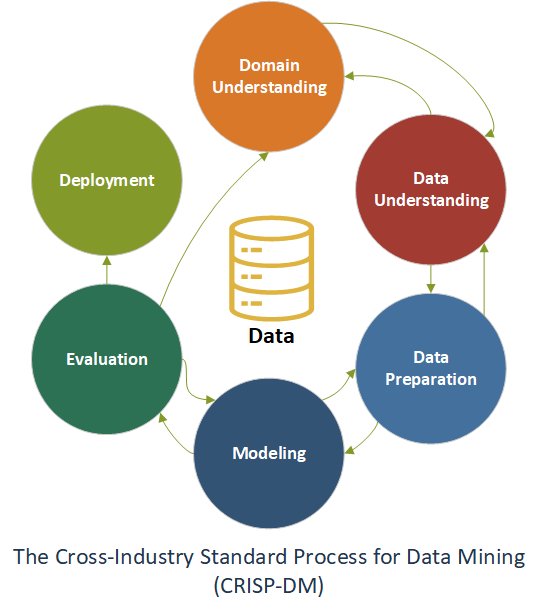</p>

<h3>The Hypothesis</h3>
<p>Based on the NHANES data, we can hypothesize the following:</p>

<p><strong>H<sub>0</sub></strong>: There IS NO significant association between a respondant&apos;s physical health factors and their feeling of &quot;better off dead more than half of the days&quot;.</p>

<p><strong>H<sub>A</sub></strong>: There IS significant association between a respondant&apos;s physical health factors and their feeling of &quot;better off dead more than half of the days&quot;.</p>

<p>If the data does not show a statistical significance between health factors and the feeling that a person is better off dead, we fail to reject H<sub>0</sub>. Conversely, we will reject H<sub>0</sub> in favor of H<sub>A</sub> if the data does show statistical significance.</p>

<h3>1. Data Understanding</h3>

<p>The NHANES survey data (2005-2006) consists of 109 datasets separated by various categories of nutrition and health. Each of the 109 PDF data dictionaries were analyzed to identify relevant predictors within the domain of our hypothesis, including nutrition and physical health as they relate to mental health &ndash; in this case various indicators of depression (the target variables).</p>
    
<h3>2. Data Preparation</h3>

<h4>Extract and Load</h4>
<p>The datasets were imported into Microsoft SQL Server with EasyCsv (<a href="https://github.com/jbonfardeci/EasyCsv">https://github.com/jbonfardeci/EasyCsv</a>), written by John Bonfardeci. EasyCsv is a powerful transactional-based open-source data import program written in C# (as well as a <a href="https://github.com/jbonfardeci/power-csv">PowerShell version &ndash; PowerCsv</a>) that can create the DDL create table scripts, clean the data, convert each column to the correct data type, and handle billions of rows of data with SQL transaction batches.</p>

<h4>Transform</h4>
<p>Since the data for each survey is encoded by an ordinal number, the data had to be one-hot-encoded for categorical predictors and targets. All column names were converted from the code name to a human-readable name. This resulted in over 1700 predictors and over 45 possible target variables. The data was then joined in SQL among three (3) SQL views pertaining to categories of data including lab work numbers, reported foods eaten over the last 12 months, levels of health and miscllaenous variables related to military/veteran status and overall physical health. The combined datset has 5,334 rows.</p>

<p>With the SQL views in place, the underlying data tables can be automatically be updated with future versions of the survey data, given the schema does not change significantly.</p>

In [2]:
# CSS Formatting for Jupyter Notebooks
from IPython.core.display import HTML
HTML("""
<style>
p, blockquote {font-size: 1.4em; font-family: 'Times New Roman';}
h2, h3, h4 {color: #A50021; display:block; border-bottom:1px solid #A50021; padding:4px;}
h2 {font-size: 2.6em;}
h3 {font-size: 2.2em; padding-left:10px;}
h4 {font-size: 1.8em; padding-left:20px;}
</style>
""")

<p>We begin by importing the ML libraries needed to develop our model.</p>

In [3]:
import sys
from typing import List
import math
import re

import pandas as pd
from pandas import DataFrame

import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRFClassifier

from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sb

sys.path.append("./schemas")
from statutils import *

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

/home/jbonfardeci/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<h3>3. Import the Data</h3>
<h4>Lab Results and General Health Dataset</h4>
<p>Pandas is utilized to import the dataset. A custom schema will be applied to ensure each variable/column is handled correctly. This custom schema as created with SQL that translates, for instance, a bit type to a Boolean type for Pandas. By default Pandas will declare a 1/0 as an integer when it must be a Boolean data type the ML binary classifier algorithms expect. Furthermore, Pandas will declare a 32-bit integer or Float as 64 bit when it only needs to be a 32-bit number, saving memory and improving processing time. The SQL is shown below.</p>

```{sql}
SELECT
	ROW_NUMBER() OVER(ORDER BY ORDINAL_POSITION) as id,
	CONCAT('"', COLUMN_NAME, '": "', 
		CASE DATA_TYPE 
			WHEN 'int' THEN 'Int32'
			WHEN 'bit' THEN 'bool'
			ELSE 'float32'
		END, '",') as [json]
FROM 
	INFORMATION_SCHEMA.COLUMNS
WHERE 
	TABLE_NAME = 'vw_DietDataModel'
;
```

In [4]:
# Show top 10 keys of the schema generated by the SQL above.
from schema import schema as pandas_data_schema
for k in [k for k in pandas_data_schema.keys()][:10]:
    print(f"'{k}': '{pandas_data_schema[k]}'")

'sequence_number': 'Int32'
'is_male': 'bool'
'is_veteran_or_military': 'bool'
'bmi': 'float32'
'avg_systolic_bp': 'Int32'
'avg_diastolic_bp': 'Int32'
'fasting_glucose_mg_dl': 'float32'
'insulin_mg_dl': 'float32'
'salt_type__iodized': 'bool'
'salt_type__lite': 'bool'


<h4>Import and Preview the Dataset</h4>

In [5]:
def get_data(filepath, dummies=False):
    data = pd.read_csv(filepath, dtype=pandas_data_schema)
    data.index = data.sequence_number
    data.drop(labels=['sequence_number'], inplace=True, axis=1)

    # Remove target variable columns where the respondent stated "not at all" for the depression survey questions. 
    drop_cols = [col for col in data.columns if "Not_at_all" in col or "not_used" in col]
    data.drop(labels=drop_cols, inplace=True, axis=1)
    if dummies:
        data = pd.get_dummies(data)
    return data
    
if __name__ == '__main__':
    data = get_data('./data/diet_data_results_lab.csv', False)
    display(data.head())

,is_male,is_veteran_or_military,bmi,avg_systolic_bp,avg_diastolic_bp,fasting_glucose_mg_dl,insulin_mg_dl,salt_type__iodized,salt_type__lite,salt_type__substitute,salt_type__other,on_weightloss_diet,on_lowfat_low_cholesterol_diet,on_low_salt_diet,on_low_sugar_diet,on_low_fiber_diet,on_high_fiber_diet,on_diabetic_diet,on_muscle_building_diet,on_other_special_diet,number_of_foods_reported,continine_ng_ml,albumin,alanine_aminotransferase,aspartate_aminotransferase,alkaline_phosphotase,bun,total_calcium,cholesterol,bicarbonate,reatinine,gamma_glutamyl_transferase,glucose_serum,iron,lactate_dehydrogenase,phosphorus,total_bilirubin,total_protein,triglycerides,uric_acid,potassium,chloride,osmolality,globulin,urinary_total_arsenic,urinary_arsenous_acid,urinary_arsenic_acid,urinary_arsenobetaine,urinary_arsenocholine,urinary_dimethylarsonic_acid,urinary_monomethylacrsonic_acid,urinary_trimethylarsine_oxide,total_cholesterol,mercury_total,transferrin_receptor,triglyceride,ldl_cholesterol,apolipoprotein,glucose_tolerance,albumin_urine,creatinine_urine,iodine_urine,mercury_urine,barium_urine,beryllium_urine,cadmium_urine,cobalt_urine,cesium_urine,molybdenum_urine,lead_urine,platinum_urine,thallium_urine,tungsten_urine,uranium_urinary,alpha_carotene,trans_beta_carotene,cis_beta_carotene,b_cryptoxanthin,g_tocopherol,lutein_zeaxanthin,trans_lycopene,retinyl_palmitate,retinyl_stearate,vitamin_a,vitamin_e,total_lycopene,vitamin_b12,vitamin_c,vitamin_d,water_bromoform,water_chloroform,water_bromodichloromethane,water_dibromochloromethane,water_mtbe,num_days_drink_alc_wk,hypertension,high_cholesterol,controlling_wt,general_health__excellent,general_health__very_good,general_health__good,general_health__fair,general_health__poor,total_num_of_dietary_supplements_taken,diabetes,little_interest_in_doing_things,tired_or_low_energy,trouble_concentrating,trouble_sleeping,y_better_off_dead,y_better_off_dead__Several_days,y_better_off_dead__More_than_half_the_days,y_better_off_dead__Nearly_every_day
sequence_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31130,False,False,NaN,<NA>,<NA>,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,False,False,False,False,False,False,False,2.0,False,False,False,False,False,False,False,False,False
31131,False,False,30.90,139,73,90.0,10.03,False,False,False,False,False,False,False,False,False,False,False,False,False,15.0,0.035,3.5,14.0,16.0,74.0,6.0,8.9,103.0,23.0,0.8,17.0,87.0,51.0,105.0,3.4,0.4,6.9,78.0,4.9,4.1,106.0,271.0,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,1.97,4.6,86.0,49.0,50.0,126.0,18.0,202.0,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,5.3,0.5,2.5,135.0,8.7,11.0,0.9,0.5,41.7,604.0,23.6,510.0,0.82,12.0,0.071,5.300,0.800,0.120,0.071,0,True,False,False,False,False,True,False,False,0.0,True,False,False,False,False,False,False,False,False
31132,True,True,24.74,130,57,157.0,8.99,False,True,False,False,False,False,False,False,False,False,False,False,False,28.0,0.021,5.0,31.0,29.0,48.0,25.0,9.9,152.0,29.0,1.2,22.0,155.0,89.0,165.0,3.4,1.0,7.2,59.0,7.2,3.8,102.0,287.0,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,0.23,NaN,65.0,75.0,75.0,NaN,6.5,162.0,538.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.1,45.5,2.3,3.5,95.0,18.5,35.0,2.9,0.5,90.9,1300.0,64.0,752.0,0.78,27.0,0.160,18.000,6.000,2.300,0.071,1,True,True,True,False,True,False,False,False,1.0,True,False,False,False,False,False,False,False,False
31134,True,True,30.63,120,67,100.0,14.51,True,False,False,False,False,False,False,False,False,False,False,False,False,14.0,0.065,3.9,30.0,31.0,77.0,13.0,9.5,185.0,27.0,1.2,33.0,93.0,84.0,158.0,3.3,

<h4>Identifiy the Target Variables</h4>
<p>In the SQL views, the target variables have been prefixed with a <code>y_</code> to indicate a Y target for the set of predictors (X<sub>n</sub>). Given we do not yet know which target variable will result in the most valid and accurate model, we will automate the modeling of 36 different Y targets with a set of feature selection methods and ML algorithms. We will then score each model for the true-positive and true-negative rates, and the overall balanced accuracy.</p>

In [6]:
TARGET = 'y_better_off_dead__More_than_half_the_days'
# Select column names from the list where prefixed with 'y_'.
TARGET_COLUMNS = [col for col in data.columns if re.match(r'^y_', col)]
if TARGET != None:
    TARGET_COLUMNS.remove(TARGET)
    data.drop(labels=TARGET_COLUMNS, inplace=True, axis=1)
    TARGET_COLUMNS = [TARGET]

In [7]:
row_ct, col_ct = data.shape
print(f"The dataset has {row_ct} rows, {col_ct-len(TARGET_COLUMNS)} features, and {len(TARGET_COLUMNS)} possible target variables.")

The dataset has 5334 rows, 109 features, and 1 possible target variables.


<h4>A &quot;Rare Event&quot; Problem</h4>
<p>When predicting a target variable that is a class (aka, categorical variable) with two or more levels, the level with the smallest percentage is called the <em>minority class</em>.</p>

<p>A minority class that is less than 2% of the target variable presents a problem for ML models. There is not enough of the minority class for the ML model to &quot;learn&quot; from. As a result, there have been a number of techniques developed to overcome what is called a <em>Rare Event Problem</em>. These techniques include oversampling of the minority class, or undersampling of the majority class. Other techniques involve synthesizing extra data rows from existing values of the minority class rows, called SMOTE, which is short for Synthetic Minority Oversampling Technique. In this case, all of the indicators of depression represent less than 2% of the survey respondents. So we will opt to oversample the minority classes, utilizing the Imbalanced Learn library. While synthesizing data rows is a clever method, it trains a model on contrived data. It is only necessary to increase the footprint of the minority class so the ML model has enough of each class label to train on.</p>

<p>The function below, shows how we split the data into a training dataset consisting of 70% of the data, and a validation (aka, test) dataset consisting of the remaining 30%. We will train the model on the training set, and test how well the model can <em>predict</em>a class label on data it has never been given before on the validation dataset.</p>

<p>If a class label is less than 2% of the data, the variable, <code>oversample</code> is set to <code>True</code>, which creates an instance of <code>RandomOverSampler</code>. This instance will fit and resample the data to 50/50.</p>

<p>Additionally, <code>RobustScaler</code> will be employed to normalize numerical data that is on different scales of measure. This normalization method improved the balanced accuracy of the model by 1-2%.</p>

In [8]:
def split_training_validation_data(data:DataFrame, y:str, target_columns:List, train_size:float=0.7, normalize=True):
    """
    Splits a Pandas dataframe into training and validation datsets.
    The default is 70:30 training:validation. This can be changed by in/decreasing the value of the `train_size` (0.0, 1.0).
    If the minority class is less than 2%, oversample the minority class.
    """
    df = data.copy()
    to_drop = target_columns.copy()
    if y in to_drop:
        to_drop.remove(y)
    
    try:
        df.drop(labels=to_drop, axis=1, inplace=True)
    except:
        pass
    
    # Split into training/validation datasets.
    x_train, y_train, x_val, y_val, features = split_train_val(df, y, train_size)
    pos_orig = len([y for y in y_train if y == 1])
    neg_orig = len(y_train) - pos_orig
    
    # Normalize numerical data with RObust Scaler which is more resistant to outliers.
    if normalize:
        scaler = RobustScaler()
        x_train = scaler.fit_transform(x_train)
        x_val = scaler.fit_transform(x_val)
    
    # Resample the data if the minority class is < 2%.
    pos_ratio = pos_orig/len(y_train)
    oversample = True if pos_ratio < 0.02 else False

    if oversample:
        ros = RandomOverSampler(random_state=42)
        x_over, y_over = ros.fit_resample(x_train, y_train)
        pos = len([y for y in y_over if y == 1])
        neg = len(y_over) - pos
        print(f'Before ROS - #True: {pos_orig} #False: {neg_orig} Ratio: {round(pos_ratio, 2)} Num rows: {len(y_train)}')
        print(f'After ROS  - #True: {pos} #False: {neg} Ratio: {pos/len(y_over)} Num rows: {len(y_over)}')
        return x_over, y_over, x_val, y_val, features
    
    return x_train, y_train, x_val, y_val, features

<h3>Food Frequency Over the Last 12 Months</h3>
<p>Though this dataset contains 1,577 predictors, it proved to add too much &quot;noise&quot; to the model, reducing model accruacy. Therefore, ths food frequency datasset is shown for reference but excluded from the modeling process.</p>

In [9]:
if __name__ == '__main__':
    from food_freq_schema import schema as food_freq_schema
    food_data = pd.read_csv('./data/food_freq.csv', dtype=food_freq_schema, low_memory=False)
    print(food_data.shape)

(6013, 1577)


In [10]:
# Merge with Food Frequency
if False and __name__ == '__main__':
    food_data.drop(labels=['SEQN_FF2'], inplace=True, axis=1)

    tmp = pd.merge(left=data
                    , right=food_data
                    , left_on='sequence_number' 
                    , right_on='SEQN'
                    , copy=True
                   )
    tmp.drop(labels=['SEQN'], inplace=True, axis=1)
    data = tmp
    display(data)

<h3>Configure the ML Algorithms to Test on the Data</h3>
<p>Below, constants (all-caps) are declared with the feature selection methods and ML classifiers we wish to test.</p> 
    
<p>Only one best model will be selected. Each set of X variables selected for each Y is stored in <code>MEMOIZED_FEATURE_SETS</code>, so we can select features only once and then reuse for each subsequent ML algorithm, saving much processing time.</p>

In [11]:
# Constants
MEMOIZED_FEATURE_SETS = {}
RANDOM_STATE=42
MAX_ITER = 10000
SELECTORS = [
    ('RFE', lambda X, y: get_rfe_selector(X, y, RANDOM_STATE))
]
XGB_PARAMS = {
    'colsample_bynode': 0.8,
    'learning_rate': 1,
    'max_depth': 3,
    'num_parallel_tree': 100,
    'objective': 'binary:logistic',
    'subsample': 0.8,
    'random_state': RANDOM_STATE,
    'eval_metric': 'logloss',
    'use_label_encoder': False
}
TREE_PARAMS = {
    'criterion': 'gini', 
    'min_samples_split': 200, 
    'min_samples_leaf': 100, 
    'max_depth': 3,
    'random_state': RANDOM_STATE
}
CLASSIFIERS = [
    ('Logistic Regression', LogisticRegression(random_state=RANDOM_STATE, max_iter=MAX_ITER)),
    ('Decision Tree', DecisionTreeClassifier(**TREE_PARAMS)),
    ('Random Forest', RandomForestClassifier(**TREE_PARAMS)),
    ('XGBoost', XGBRFClassifier(**XGB_PARAMS)),
    ('AdaBoostClassifier', AdaBoostClassifier(n_estimators=30, random_state=RANDOM_STATE)),
    ('BaggingClassifier', BaggingClassifier(n_estimators=10, random_state=RANDOM_STATE))
]

In [12]:
if __name__ == '__main__':
    print(f"{len(TARGET_COLUMNS) * len(SELECTORS) * len(CLASSIFIERS)} model(s) will be created and tested.")

6 model(s) will be created and tested.


<h3>Impute Values. Drop columns with Missing > 5%</h3>
<p>As a general rule, if a data column is missing more than 5% of its data, it is excluded. Imputing (replacing) too much missing data will add a larger margin of error to a model's predictions. Therefore, any column with less than 5% missing has its <code>NULL/N/A</code> values replaced with either the median or mode for numerical and categorical predictors, respectively. A custom method, <code>replace_missing</code>, was written to automate imputation.</p>

In [13]:
# Impute missing values up to 5%, drop the rest.
if __name__ == '__main__':
    replace_missing(data=data, ceiling=0.05)

               col_name              missing
54             transferrin_receptor   0.698 
62                    mercury_urine   0.678 
68                 molybdenum_urine   0.678 
63                     barium_urine   0.678 
44            urinary_total_arsenic   0.678 
65                    cadmium_urine   0.678 
66                     cobalt_urine   0.678 
64                  beryllium_urine   0.678 
69                       lead_urine   0.678 
70                   platinum_urine   0.678 
71                   thallium_urine   0.678 
72                   tungsten_urine   0.678 
73                  uranium_urinary   0.678 
67                     cesium_urine   0.678 
51    urinary_trimethylarsine_oxide   0.676 
46             urinary_arsenic_acid   0.676 
48            urinary_arsenocholine   0.676 
49     urinary_dimethylarsonic_acid   0.676 
50  urinary_monomethylacrsonic_acid   0.676 
47            urinary_arsenobetaine   0.676 
45            urinary_arsenous_acid   0.676 
58        

<h3>4. Data Exploration</h3>
<p>A box and histogram will be plotted for each numerical predictor to analyze its outliers and distribution.</p>
<p>Boxplots are grouped by the target variable. Notice the differences in the box plots for each grouping by the target's True/False values. This indicates the predictor is probably significant and is correlated with the target's value. If there was too little difference between the box plots, it would indicate the predictor does not significantly effect the target.</p>

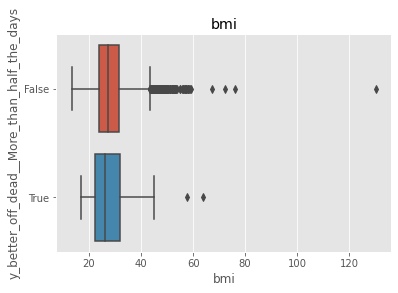

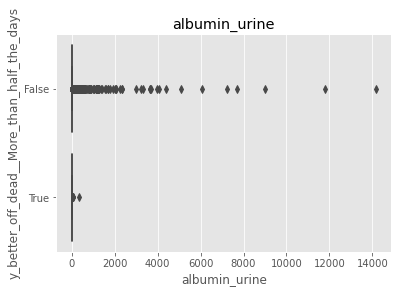

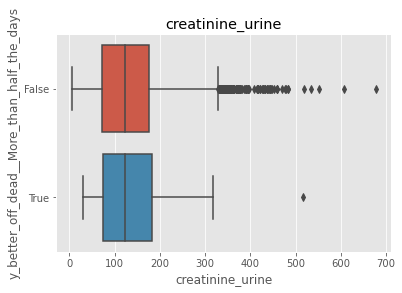

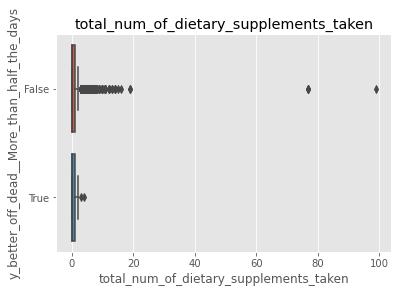

In [14]:
# Box plots.
def show_box_plots(data, log_transform=False, groupby=None):
    for col in data.columns:
        _type = str(data[col].dtype)
        if re.match(r'^(float|int)', _type):
            args = {
                'x': col,
                'orient': 'h',
                'data': data
            }
            title = col
            if log_transform:
                args['x'] = safe_log(data[col])
                title = f"Log({col})"
            else:
                args['x'] = col
                
            if groupby != None:
                args['y'] = groupby
                
            if log_transform:
                ax = sb.boxplot(**args)
            else:
                ax = sb.boxplot(**args)    
            ax.set_title(title)
            plt.show()
            
if True and __name__ == '__main__':
      show_box_plots(data, False, TARGET)

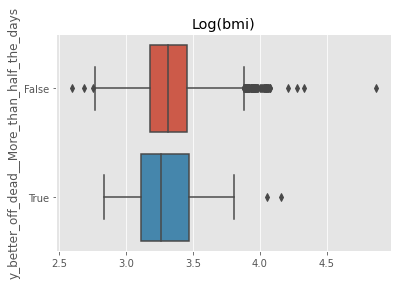

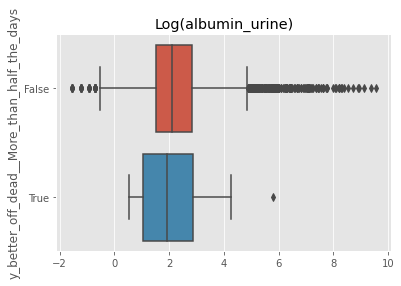

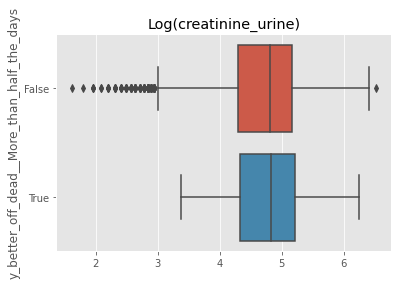

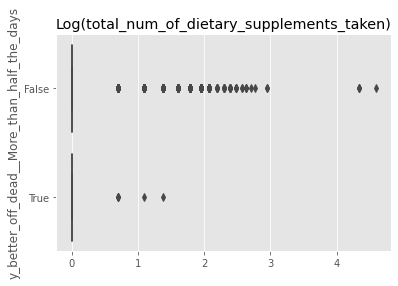

In [15]:
# Test Log Transformation for reducing outliers.
if True and __name__ == '__main__':
    show_box_plots(data, True, TARGET)

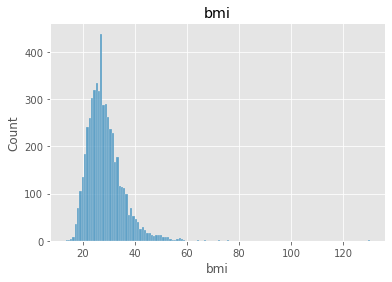

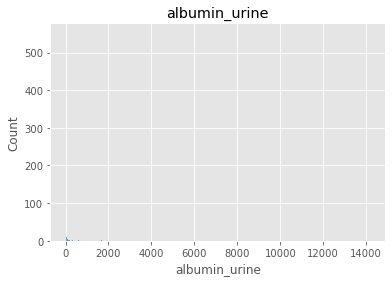

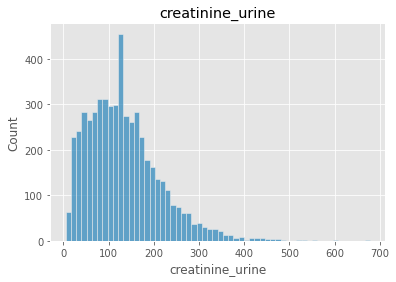

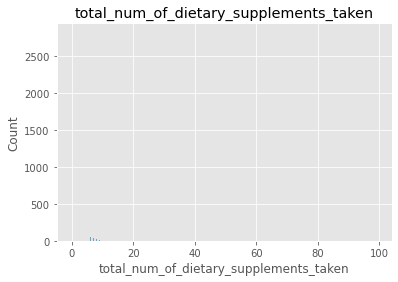

In [16]:
def show_histograms(data, log_transform=False):
    for col in data.columns:
        _type = str(data[col].dtype)
        if re.match(r'^(float|int)', _type):
            title = col
            if log_transform:
                ax = sb.histplot(x= safe_log(data[col]) )
                title = f"Log({col})"
            else:
                ax = sb.histplot(x=col, data=data) 
            ax.set_title(title)
            plt.show()
            
if True and __name__ == '__main__':
      show_histograms(data)

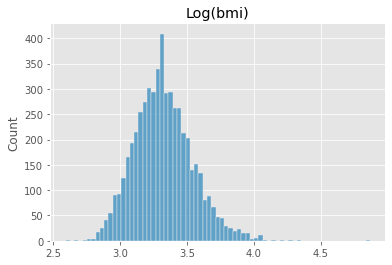

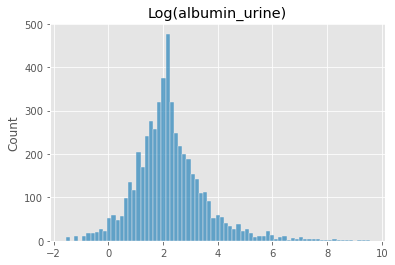

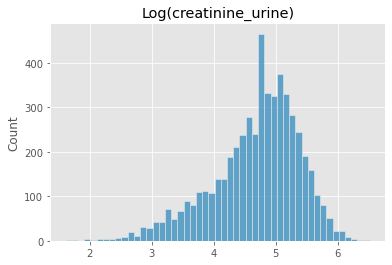

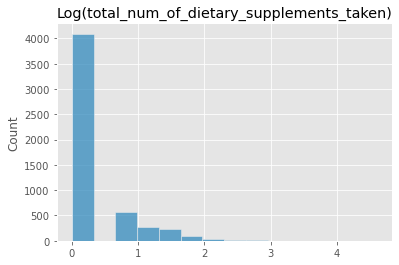

In [17]:
# Test Log Transformation to improve distribution normality.
if True and __name__ == '__main__':
    show_histograms(data, log_transform=True)

<h4>Correlation Matrix</h4>
<p>Examine correlation matrix for multicolinearity. Generally, if two variables have a correlation greater than 0.75 or less than -0.75, one or the other must be dropped to improve model stability.</p>

In [18]:
def show_correlation_matrix(data):
    df_corr = data.drop(labels=TARGET_COLUMNS, axis=1, inplace=False).corr()
    #df_corr.to_csv('./nhanes/correlation_matrix.csv')
    #display(df_corr)
    
    to_drop = []
    multicolinearity = []
    for col in df_corr:
        results = [x for x in df_corr[col] if (x >= 0.75 and x < 1.0) or (x <= -0.75 and x > -1.0)]
        if len(results) > 0:
            multicolinearity.append({
                "X": col,
                "Values": results
            })
            # Drop binary columns = 0, generated by Pandas .get_dummies()
            if '_0' in col:
                to_drop.append(col)
                print(f"Dropping {col}.")
    
    drop_cols = [x for x in data.columns if x in to_drop]
    
    if len(drop_cols) > 0:
        data.drop(labels=drop_cols, inplace=True, axis=1)
        print(f"Dropped {len(drop_cols)} column(s) from the dataset.")
        display( pd.DataFrame(data=multicolinearity) )
    else:
        print("No multicolinearity issues exist or they were resolved.")
    #get_corrs(data)
    
if True and __name__ == '__main__':
    show_correlation_matrix(data)

No multicolinearity issues exist or they were resolved.


<h3>5. Modeling</h3>
<h4>Fit All Possible Models with All Possible Target (Y) Variables</h4>
<p>The following helper functions will test:</p>
<ol>
    <li>Each Target (Y)</li>
    <li>Each Feature Selection Method</li>
    <li>Each ML Algorithm</li>
</ol>

In [19]:
def get_selector(key_name, selector):
    if key_name in MEMOIZED_FEATURE_SETS:
        return MEMOIZED_FEATURE_SETS[key_name]()

    MEMOIZED_FEATURE_SETS[key_name] = selector
    return MEMOIZED_FEATURE_SETS[key_name]()
    
def select_features(selector_obj, target_name, x_train, y_train, features):
    selector_name, selector_fn = selector_obj
    selector_key = f"{target_name}-{selector_name}"
    selector = get_selector(selector_key, lambda: selector_fn(x_train, y_train))
    selector.feature_names_in_ = features
    selector.fit(x_train, y_train)
    sig_features = list(get_features_names(sfm=selector, features=features))
    return sig_features
    
def fit_model(data, selector_obj, clf_obj, target_name, x_train, y_train, features, target_columns):
    # Select features.
    selector_name, selector_fn = selector_obj
    clf_name, clf = clf_obj
    model_name = f"{selector_name}, {clf_name}, '{target_name}'"
    #print(f"Running {model_name}...")

    if selector_name != 'None':
        sig_features = select_features(selector_obj, target_name, x_train, y_train, features)
        if len(sig_features) == 0:
            return None
    else:
        sig_features = features.copy()

    df_sig = data[ sig_features+[target_name] ].copy()
    x_train, y_train, x_val, y_val, features = get_train_val_data(df_sig, target_name, target_columns)
    
    steps = []
    if selector_name != 'None':
        steps.append( ('selector', selector_fn(x_train, y_train)) )

    steps.append(('classifier', clf))
    pipeline = Pipeline(steps=steps)
    pipeline.fit(x_train, y_train)
    
    if hasattr(pipeline, 'predict_proba'):
        stats = score_model(y_val, pipeline.predict_proba(x_val)[:,1], model_name)
    else:
        stats = score_model_non_prob(y_val, pipeline.predict(x_val), model_name)
    
    stats['NumFeatures'] = len(sig_features)
    return stats


if __name__ == '__main__':
    model_stats = []
    for target_name in TARGET_COLUMNS: 
        targets = TARGET_COLUMNS.copy()
        x_train, y_train, x_val, y_val, features_names = get_train_val_data(data, target_name, targets)
        for selector_obj in SELECTORS: 
            task = lambda clf_obj: fit_model(data, selector_obj, clf_obj, target_name, x_train, y_train, features_names, targets)
            stats = list(map(task, CLASSIFIERS))
            model_stats.extend([obj for obj in stats if obj is not None])
        # for...
    # for...

    print("Completed running all models.")
    df_models = pd.DataFrame(data=model_stats)
    df_models.sort_values('Accuracy', ascending=False, inplace=True)
    df_models.to_csv('./data/classifier_model_eval.csv')

Completed running all models.


<h3>6. Evaluation</h3>
<p>Below, all models are ranked displayed, and exported as a CSV, according to the <strong>Accuracy</strong> of predictions on the test/validation dataset.</p>

In [20]:
display(df_models)

,Model,TP,FP,TN,FN,Sensitivity,Specificity,Cutoff,Accuracy,F1 Score,Recall Score,AUC,NumFeatures
3,"RFE, XGBoost, 'y_better_off_dead__More_than_ha...",6,250,1343,1,0.857,0.843,0.43,0.850,0.046,0.857,0.916,33
2,"RFE, Random Forest, 'y_better_off_dead__More_t...",6,265,1328,1,0.857,0.834,0.44,0.845,0.043,0.857,0.905,33
4,"RFE, AdaBoostClassifier, 'y_better_off_dead__M...",5,248,1345,2,0.714,0.844,0.47,0.779,0.038,0.714,0.723,33
0,"RFE, Logistic Regression, 'y_better_off_dead__...",6,503,1090,1,0.857,0.684,0.02,0.771,0.023,0.857,0.781,33
1,"RFE, Decision Tree, 'y_better_off_dead__More_t...",4,66,1527,3,0.571,0.959,0.86,0.765,0.104,0.571,0.746,33
5,"RFE, BaggingClassifier, 'y_better_off_dead__Mo...",2,48,1545,5,0.286,0.970,0.01,0.628,0.070,0.286,0.628,33


<h3>Evaluation of Best Model</h3>
<p>Below, the model with the highest accuracy is scored and plotted as a <strong>Reciever Operating Characteristic (ROC) </strong> curve on the test/validation dataset. The closer the curve is to the upper left of the chart, the more accurate the model for true-positive and true-negative rates.</p>

<p>If model training was not overfit, the model will predict unknown data just as well as the training dataset. The confusion matrix along with the model's coefficients/feature importances are plotted on a bar graph.</p>


    From the diagnostic charts below, we can see the best model has an overall accuracy of ~85.01% 
    with a true-positive rate of predicting 'y_better_off_dead__More_than_half_the_days' with 85.71% accuracy.
    


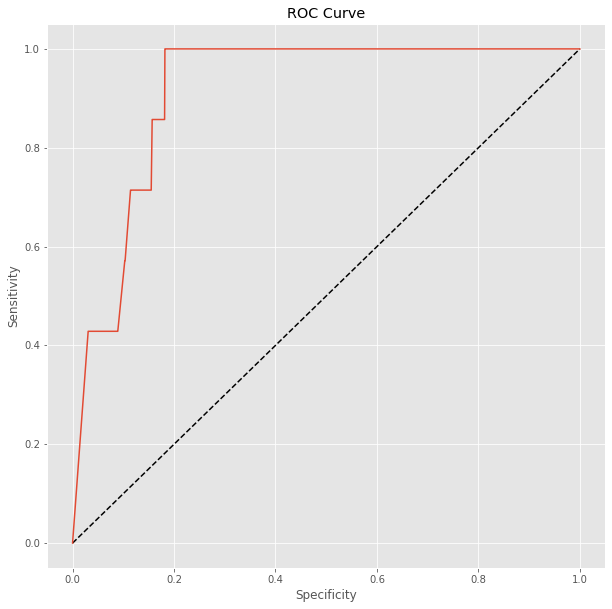

,Model,TP,FP,TN,FN,Sensitivity,Specificity,Cutoff,Accuracy,F1 Score,Recall Score,AUC
0,"Validation: RFE, XGBoost, 'y_better_off_dead__...",6,250,1343,1,0.857,0.843,0.43,0.850,0.046,0.857,0.916
1,"Training: RFE, XGBoost, 'y_better_off_dead__Mo...",3553,337,3372,156,0.958,0.909,0.71,0.934,0.935,0.958,0.964


,Predictor(X),PValue,Coefficient
27,little_interest_in_doing_things,0.000e+00,3.769
24,general_health__poor,1.009e-137,3.680
29,trouble_concentrating,0.000e+00,2.350
19,controlling_wt,8.090e-14,2.195
28,tired_or_low_energy,0.000e+00,1.935
26,diabetes,6.996e-60,1.420
7,on_weightloss_diet,2.909e-22,1.093
17,num_days_drink_alc_wk,5.276e-03,1.083
16,creatinine_urine,4.374e-10,0.835
12,on_diabetic_diet,1.354e-22,0.789


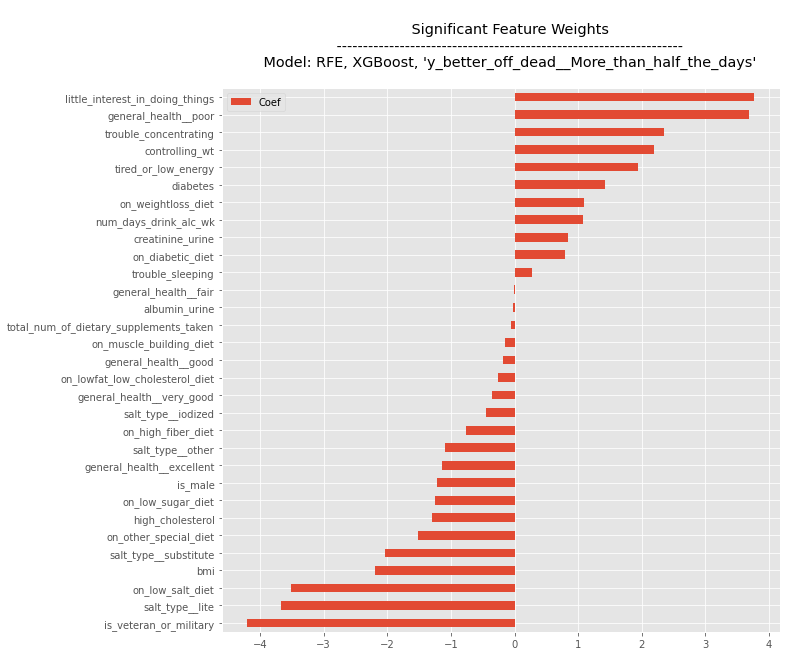

In [23]:
def get_pvalue_frame(features, x, y) -> DataFrame:
    selector = SelectKBest(k=len(features))
    clf = LogisticRegression(random_state=42, max_iter=10000, n_jobs=-1)
    pipeline = Pipeline([
        ('selector', selector),
        ('logit', clf)
    ])
    selector.feature_names_in_ = features
    clf.feature_names_in_ = features
    pipeline.fit(x, y)

    _iter = zip(selector.get_feature_names_out(features), selector.pvalues_, clf.coef_[0])
    estimates = [(x, pval, coef) for (x, pval, coef) in _iter if pval <= 0.05]
    
    df = pd.DataFrame(columns=['Predictor(X)', 'PValue', 'Coefficient'], data=estimates)
    df.sort_values('Coefficient', ascending=False, inplace=True)
    return df

def get_model_params(model_name):
    best_selector, best_model, target_name = list(map(lambda s: str(s).strip().replace("'", ""), model_name.split(',')))
    return best_selector, best_model, target_name

def get_model(model_name):
    best_selector, best_model, target_name = get_model_params(model_name)
    selector_name, selector_obj = [(name, obj) for (name, obj) in SELECTORS if name == best_selector][0]
    clf_name, clf_obj = [(name, obj) for (name, obj) in CLASSIFIERS if name == best_model][0]
    x_train, y_train, x_val, y_val, features_names = get_train_val_data(data, target_name, TARGET_COLUMNS)
    
    pipeline = Pipeline([
        ('selector', selector_obj(x_train, y_train)),
        ('classifier', clf_obj)
    ])
    pipeline[0].feature_names_in_ = features_names
    pipeline.fit(x_train, y_train)
    
    stats = []
    if hasattr(pipeline, 'predict_proba'):
        prob = pipeline.predict_proba(x_val)[:,1]
        prob_train = pipeline.predict_proba(x_train)[:,1]
        stats.extend(
            [
                score_model(y_val, prob, f"Validation: {model_name}"),
                score_model(y_train, prob_train, f"Training: {model_name}")
            ]
        )
        cutoff = stats[0]['Cutoff']
        yhat = list(map(lambda p: True if p >= cutoff else False, prob))
    else:
        yhat = pipeline.predict(x_val)
        yhat_train = pipeline.predict(x_train)
        stats.extend(
            [
                score_model_non_prob(y_val, yhat, f"Validation: {model_name}"),
                score_model_non_prob(y_train, yhat_train, f"Training: {model_name}")
            ]
        )

    df_stats = pd.DataFrame(data=stats)
    _iter = zip(pipeline[0].get_support(), pipeline[0].get_feature_names_out(features_names))
    sig_features = [x for b,x in _iter if b]
    return pipeline, prob, df_stats, yhat, target_name, sig_features, x_train, y_train, x_val, y_val

def show_diagnostics(selected_model_name):
    best_selector, best_model, target_name = get_model_params(selected_model_name)
    pipeline, prob, df_stats, yhat, target_name, sig_features, x_train, y_train, x_val, y_val = get_model(selected_model_name)
    
    print(f"""
    From the diagnostic charts below, we can see the best model has an overall accuracy of ~{round(df_stats.Accuracy.iloc[0]*100, 2)}% 
    with a true-positive rate of predicting '{target_name}' with {round(df_stats.Sensitivity.iloc[0]*100, 2)}% accuracy.
    """)
    clf_obj = pipeline[1]

    if hasattr(clf_obj, 'coef_'):
        weights = clf_obj.coef_[0]
    elif hasattr(clf_obj, 'feature_importances_'):
        weights = clf_obj.feature_importances_
        
    #weights = [w for w in weights if round(w,5) > 0]
    coef_title = f"""
    Significant Feature Weights
    ------------------------------------------------------------------
    Model: {selected_model_name}
    """
    
    pvals = get_pvalue_frame(sig_features, x_train, y_train)
    
    plot_roc(y_val, prob)
    display(df_stats)
    display(pvals)
    plot_coef(pvals['Predictor(X)'], pvals['Coefficient'], title=coef_title)
        
    #plot_coef(sig_features, weights, title=coef_title)
    return clf_obj, sig_features

if __name__ == '__main__':
    clf_obj, sig_features = show_diagnostics(selected_model_name=str(df_models.Model.iloc[0]))

<h3>7. Model Interpretation</h3>

<p>The significant features plot (above) displays the coefficient (aka, multiplier) for each feature. If we look at the top predictor, <code>little_interest_in_doing_things</code>, we see it has a coefficient of 3.769. This means that a respondant who answered 'yes' to this question has a 3.769% increased chance of responding they'd feel &quot;better off dead...&quot;. Likewise with the second predictor, <code>general_health_poor</code>, a respondant who answerws 'yes' has a 3.680% increased chance, and so on. Conversely, if the respondant indicated having excellent general health with a coeficient of -1.147, they'd be 1.147% <em>less</em> likely to responding they'd be better off dead.</p>

<p>Given this proof-of-concept excercise is succesful with a reasonably high accuracy and set of significant predictors, it is our hope that our data science approach can be employed to improve the health and wellness of our soldiers and veterans, and prevent suicides for at-risk individuals.</p>

<p>With future research and more data, the accuracy of the model can be improved. However, this is a good start to understanding the relationships between diet and physical health and their effects on mental health.</p>